In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv("Data Fusion Assignment 2025 Data.csv")

# EDA

In [ ]:
df.head()

,class,id,color,transparency,device_id,spectrum_0 + 740,spectrum_1 + 740,spectrum_2 + 740,spectrum_3 + 740,spectrum_4 + 740,...,sample_raw_321 + 740,sample_raw_322 + 740,sample_raw_323 + 740,sample_raw_324 + 740,sample_raw_325 + 740,sample_raw_326 + 740,sample_raw_327 + 740,sample_raw_328 + 740,sample_raw_329 + 740,sample_raw_330 + 740
0,1,1,white,o,B0236F1F2D02C632,0.782157,0.754932,0.730555,0.709195,0.690707,...,5.54,5.32,5.08,4.80,4.50,4.16,3.80,3.42,3.00,2.55
1,1,2,white,o,B0236F1F2D02C632,0.948156,0.947904,0.947607,0.947237,0.946815,...,6.08,5.84,5.57,5.27,4.94,4.57,4.18,3.75,3.29,2.80
2,1,4,none,s,B0236F1F2D02C632,0.285657,0.285247,0.284841,0.284432,0.284022,...,1.47,1.42,1.35,1.28,1.20,1.11,1.01,0.91,0.80,0.68
3,1,5,none,s,B0236F1F2D02C632,0.296280,0.295966,0.295631,0.295269,0.294887,...,1.65,1.58,1.51,1.43,1.34,1.24,1.13,1.02,0.89,0.76
4,1,6,none,t,B0236F1F2D02C632,0.171568,0.171535,0.171500,0.171459,0.171414,...,1.31,1.26,1.20,1.14,1.07,0.99,0.90,0.81,0.71,0.61


In [33]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Columns: 998 entries, class to sample_raw_330 + 740
dtypes: float64(993), int64(2), object(3)
memory usage: 2.8+ MB


C:\Users\ronjd\AppData\Local\Temp\ipykernel_21572\3441259374.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, ax=ax, palette=palette)
C:\Users\ronjd\AppData\Local\Temp\ipykernel_21572\3441259374.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, ax=ax, palette=palette)
C:\Users\ronjd\AppData\Local\Temp\ipykernel_21572\3441259374.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, ax=ax, palette=palette)


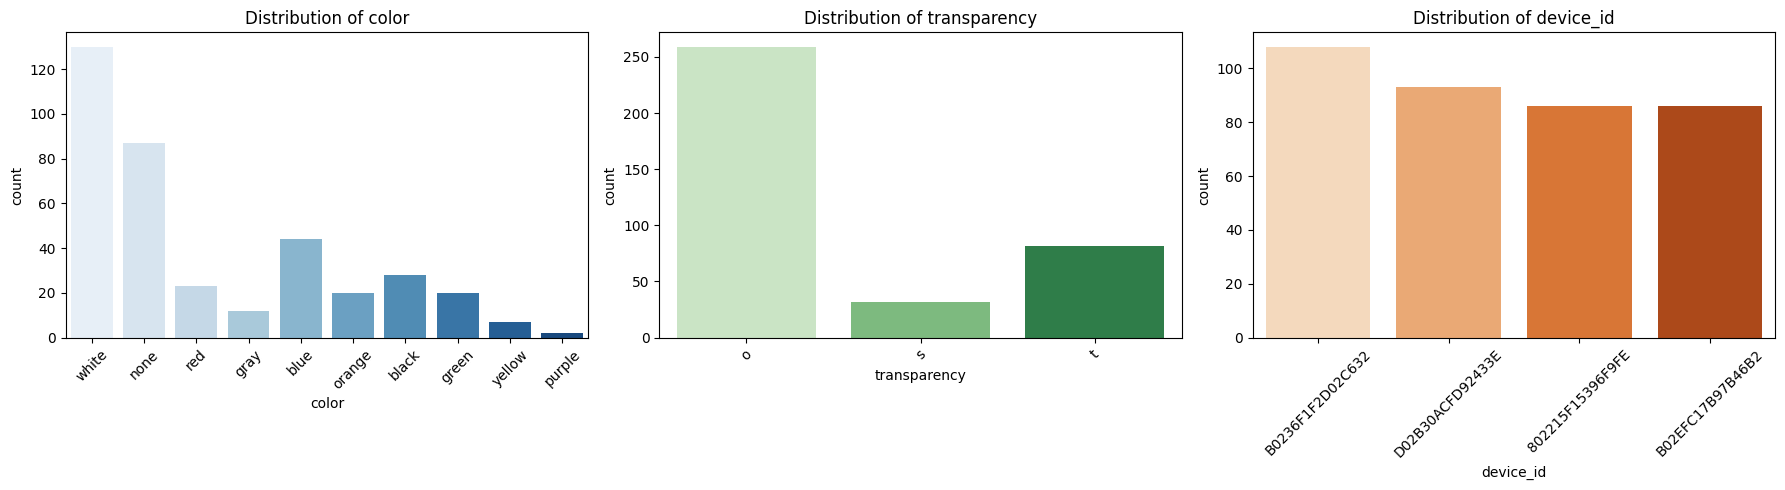

In [ ]:

categorical_features = ['color', 'transparency', 'device_id']


palettes = [
    "Blues",        # For 'color'
    "Greens",       # For 'transparency'
    "Oranges"       # For 'device_id'
]

fig, axes = plt.subplots(1, len(categorical_features), figsize=(18, 5))
for ax, feature, palette in zip(axes, categorical_features, palettes):
    sns.countplot(data=df, x=feature, ax=ax, palette=palette)
    ax.set_title(f"Distribution of {feature}")
    ax.tick_params(axis='x', rotation=45)  

plt.tight_layout()
plt.show()

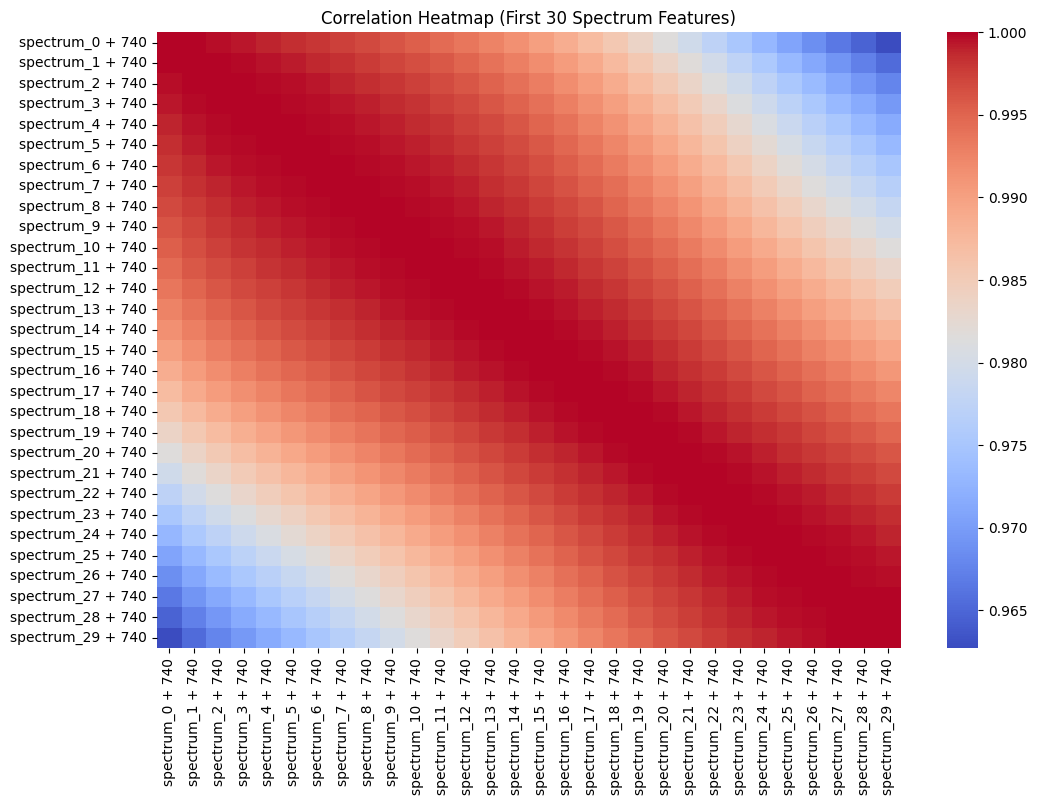

In [ ]:
#correlation of first 30 spectral features
subset = df.filter(regex='spectrum_', axis=1).iloc[:, :30]  
plt.figure(figsize=(12, 8))
sns.heatmap(subset.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap (First 30 Spectrum Features)')
plt.show()

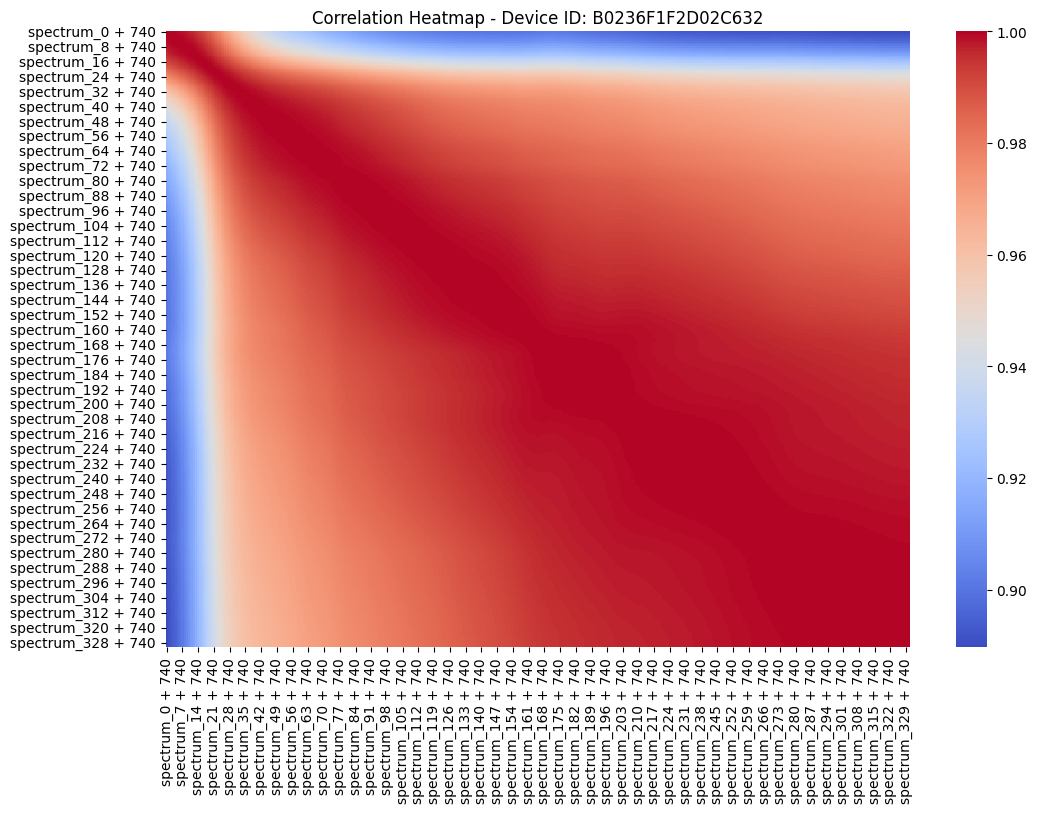

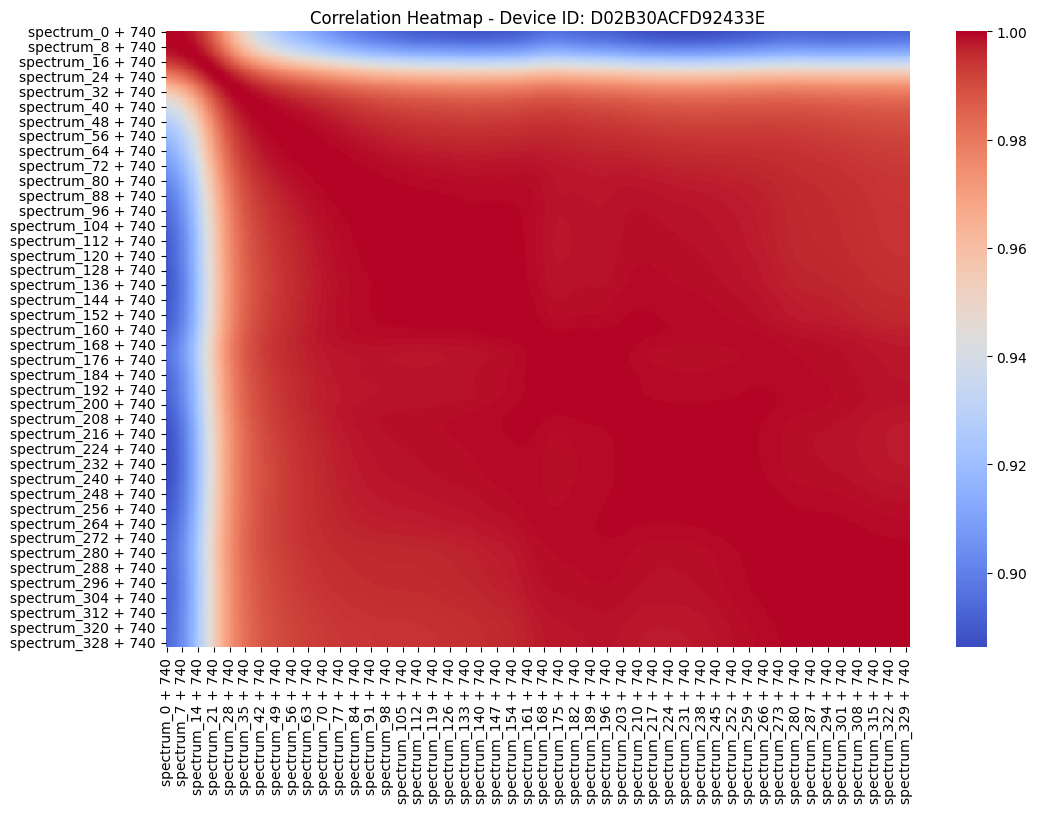

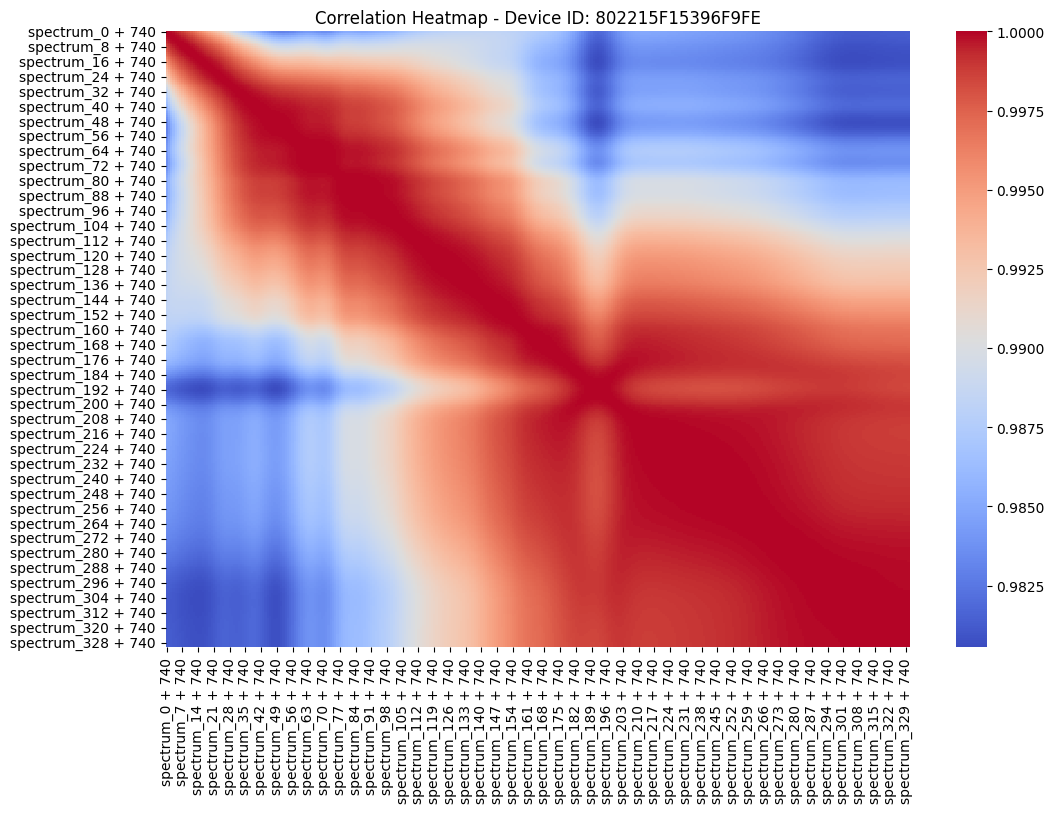

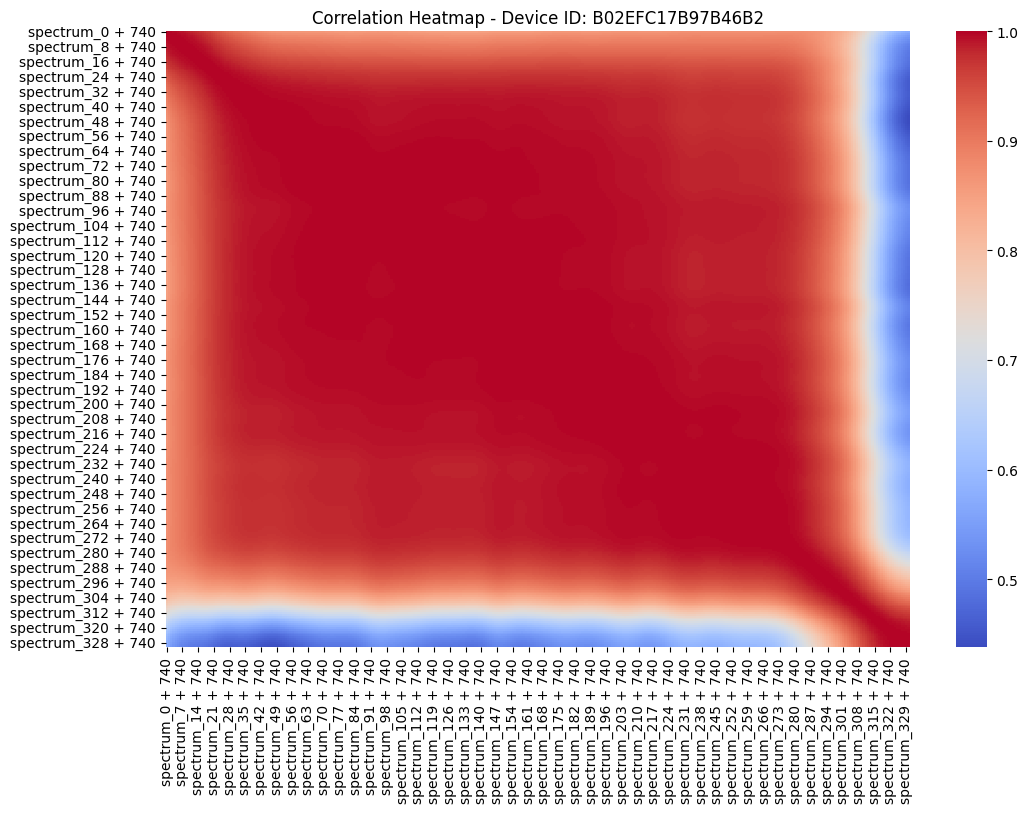

In [ ]:
unique_device_ids = df["device_id"].unique()

spectrum_features = [col for col in df.columns if col.startswith("spectrum_")]


for device_id in unique_device_ids:
    subset = df[df["device_id"] == device_id][spectrum_features]
    
    if subset.shape[0] > 1:  
        plt.figure(figsize=(12, 8))
        sns.heatmap(subset.corr(), cmap='coolwarm', annot=False)
        plt.title(f'Correlation Heatmap - Device ID: {device_id}')
        plt.show()

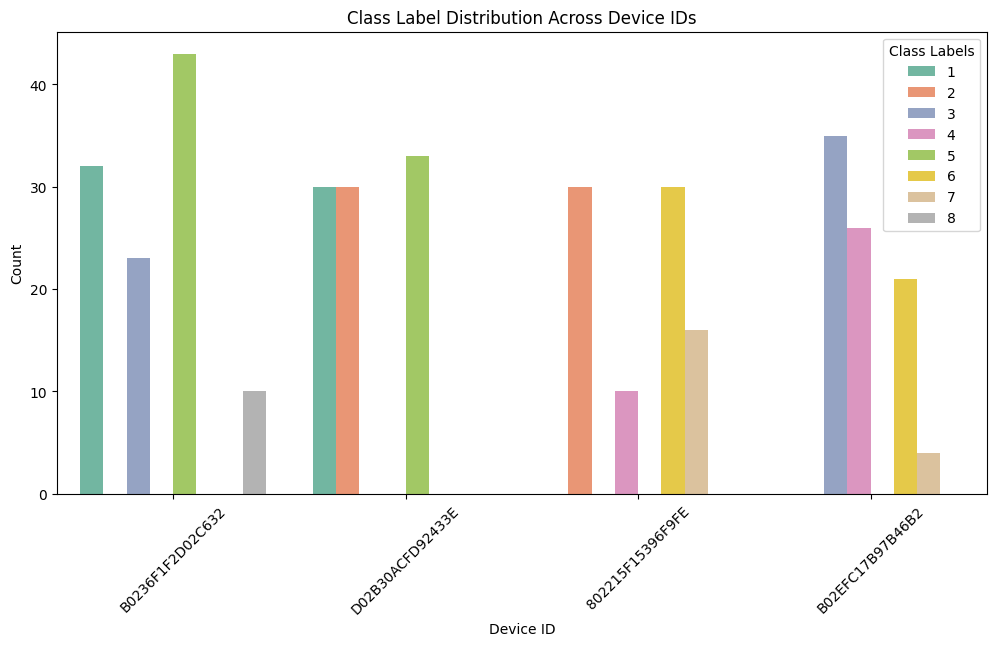

In [37]:
# Label Distribution Across Device IDs
if 'class' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x="device_id", hue="class", palette="Set2")
    plt.title("Class Label Distribution Across Device IDs")
    plt.xlabel("Device ID")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title="Class Labels")
    plt.show()
else:
    print("The dataset does not contain a 'class' column.")

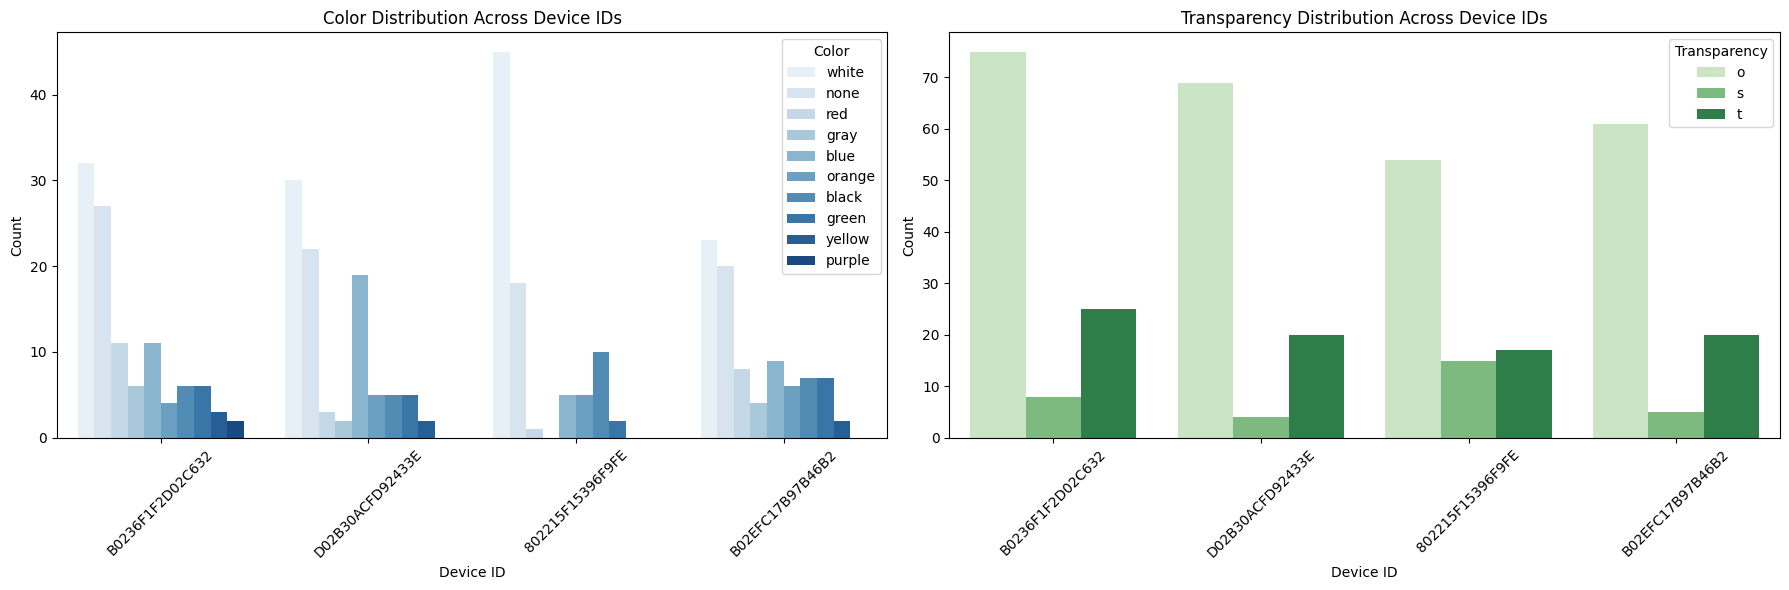

In [ ]:
# Color and Transparency Distribution Across Device IDs
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.countplot(data=df, x="device_id", hue="color", palette="Blues", ax=axes[0])
axes[0].set_title("Color Distribution Across Device IDs")
axes[0].set_xlabel("Device ID")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title="Color")

sns.countplot(data=df, x="device_id", hue="transparency", palette="Greens", ax=axes[1])
axes[1].set_title("Transparency Distribution Across Device IDs")
axes[1].set_xlabel("Device ID")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title="Transparency")

plt.tight_layout()
plt.show()

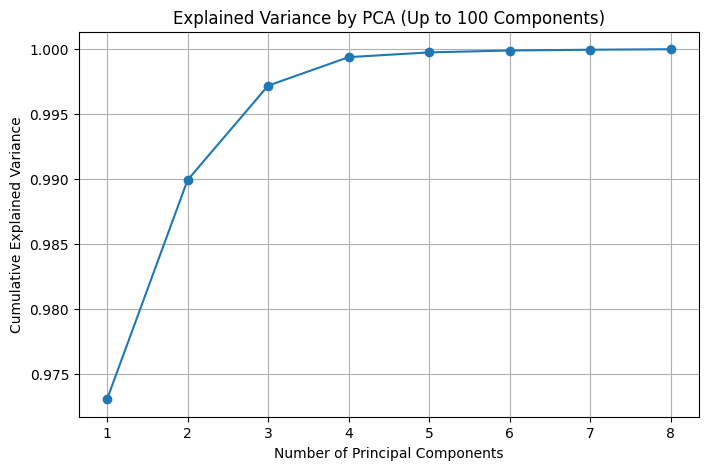

In [ ]:

columns_to_use = df.iloc[:, 5:336]
normalized_columns = StandardScaler().fit_transform(columns_to_use)

pca = PCA(n_components=8)
pca.fit(normalized_columns)

explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA (Up to 100 Components)')
plt.grid()
plt.show()

# data preprocessing


In [40]:
df.isnull().sum()

class                   0
id                      0
color                   0
transparency            0
device_id               0
                       ..
sample_raw_326 + 740    0
sample_raw_327 + 740    0
sample_raw_328 + 740    0
sample_raw_329 + 740    0
sample_raw_330 + 740    0
Length: 998, dtype: int64

In [41]:
df.shape


(373, 998)

In [42]:
#removing the unwanted collumns 
data = df.iloc[:, 0:336]

In [43]:
data.dtypes

class                   int64
id                      int64
color                  object
transparency           object
device_id              object
                       ...   
spectrum_326 + 740    float64
spectrum_327 + 740    float64
spectrum_328 + 740    float64
spectrum_329 + 740    float64
spectrum_330 + 740    float64
Length: 336, dtype: object

In [ ]:
# One-hot encode transparency and device_id
data['transparency'] = data['transparency'].astype('category')  
data['color'] = data['color'].astype('category')  
data = pd.get_dummies(data, columns=['transparency', 'color'], drop_first=False)


In [45]:
data.dtypes

class                 int64
id                    int64
device_id            object
spectrum_0 + 740    float64
spectrum_1 + 740    float64
                     ...   
color_orange           bool
color_purple           bool
color_red              bool
color_white            bool
color_yellow           bool
Length: 347, dtype: object

In [46]:
# Merge class 8 into class 7
df["class"] = df["class"].replace({8: 7})


In [ ]:
#convert the class column to categorical
data['class'] = data['class'].astype('category') 
#one-hot encode the class column
data = pd.get_dummies(data, columns=['class'], drop_first=False)  

In [48]:
data.dtypes

id                    int64
device_id            object
spectrum_0 + 740    float64
spectrum_1 + 740    float64
spectrum_2 + 740    float64
                     ...   
class_4                bool
class_5                bool
class_6                bool
class_7                bool
class_8                bool
Length: 354, dtype: object

In [ ]:
# Split the data into separate datasets for each device
device_partitions = []
for device_id in data['device_id'].unique():
    partition = data[data['device_id'] == device_id].copy()
    partition = partition.drop('device_id', axis=1)
    device_partitions.append(partition)

#  indexing for accessing the partitions
device1_data = device_partitions[0]
device2_data = device_partitions[1]
device3_data = device_partitions[2] 
device4_data = device_partitions[3]

for i, partition in enumerate(device_partitions):
    print(f"Device {i+1} data shape: {partition.shape}")

Device 1 data shape: (108, 353)
Device 2 data shape: (93, 353)
Device 3 data shape: (86, 353)
Device 4 data shape: (86, 353)


In [ ]:
# split the data into features and target variable
train_test_splits = []
for i, partition in enumerate(device_partitions):
    # Split into features and target
    X = partition.iloc[:, :331] 
    y = partition.iloc[:, 331:]  
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Store the splits
    train_test_splits.append((X_train, X_test, y_train, y_test))
    
    # Print the shapes to verify splits
    print(f"\nDevice {i+1} splits:")
    print(f"Training set shape: {X_train.shape}")
    print(f"Testing set shape: {X_test.shape}")

# Access individual device splits
device1_train_X, device1_test_X, device1_train_y, device1_test_y = train_test_splits[0]
device2_train_X, device2_test_X, device2_train_y, device2_test_y = train_test_splits[1]
device3_train_X, device3_test_X, device3_train_y, device3_test_y = train_test_splits[2]
device4_train_X, device4_test_X, device4_train_y, device4_test_y = train_test_splits[3]


Device 1 splits:
Training set shape: (86, 331)
Testing set shape: (22, 331)

Device 2 splits:
Training set shape: (74, 331)
Testing set shape: (19, 331)

Device 3 splits:
Training set shape: (68, 331)
Testing set shape: (18, 331)

Device 4 splits:
Training set shape: (68, 331)
Testing set shape: (18, 331)


In [ ]:
#  function to apply PCA 
def apply_pca_to_device(data, n_components=3):
    spectral_data = data.iloc[:, :331] 
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(spectral_data)
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(scaled_data)
    pca_df = pd.DataFrame(
        reduced_data, 
        columns=[f'PC{i+1}' for i in range(n_components)],
        index=data.index
    )
    result = pd.concat([pca_df, data.iloc[:, 331:]], axis=1)
    
    return result, pca.explained_variance_ratio_

# model training
## Random forest training

In [52]:
training_datasets = [device1_train_X, device2_train_X, device3_train_X, device4_train_X]
pca_train = []
for train_data in training_datasets:
    preprocessed_data, _, = apply_pca_to_device(train_data)
    pca_train.append(preprocessed_data)


test_datasets = [device1_test_X, device2_test_X, device3_test_X, device4_test_X]
pca_test = []
for test_data in test_datasets:
    preprocessed_data, _, = apply_pca_to_device(test_data)
    pca_test.append(preprocessed_data)




In [53]:
# DEVICE 1
X1_train = pca_train[0].iloc[:, :3]
y1_train = np.argmax(device1_train_y.values, axis=1) + 1
X1_test = pca_test[0].iloc[:, :3]
y1_test = np.argmax(device1_test_y.values, axis=1) + 1

rf1 = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
rf1.fit(X1_train, y1_train)
y1_pred = rf1.predict(X1_test)

print("\n📿 Device 1")
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("Confusion Matrix:\n", confusion_matrix(y1_test, y1_pred))
print("Classification Report:\n", classification_report(y1_test, y1_pred, zero_division=0))

# DEVICE 2
X2_train = pca_train[1].iloc[:, :3]
y2_train = np.argmax(device2_train_y.values, axis=1) + 1
X2_test = pca_test[1].iloc[:, :3]
y2_test = np.argmax(device2_test_y.values, axis=1) + 1

rf2 = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
rf2.fit(X2_train, y2_train)
y2_pred = rf2.predict(X2_test)

print("\n📿 Device 2")
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("Confusion Matrix:\n", confusion_matrix(y2_test, y2_pred))
print("Classification Report:\n", classification_report(y2_test, y2_pred, zero_division=0))

# DEVICE 3
X3_train = pca_train[2].iloc[:, :3]
y3_train = np.argmax(device3_train_y.values, axis=1) + 1
X3_test = pca_test[2].iloc[:, :3]
y3_test = np.argmax(device3_test_y.values, axis=1) + 1

rf3 = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
rf3.fit(X3_train, y3_train)
y3_pred = rf3.predict(X3_test)

print("\n📿 Device 3")
print("Accuracy:", accuracy_score(y3_test, y3_pred))
print("Confusion Matrix:\n", confusion_matrix(y3_test, y3_pred))
print("Classification Report:\n", classification_report(y3_test, y3_pred, zero_division=0))

# DEVICE 4
X4_train = pca_train[3].iloc[:, :3]
y4_train = np.argmax(device4_train_y.values, axis=1) + 1
X4_test = pca_test[3].iloc[:, :3]
y4_test = np.argmax(device4_test_y.values, axis=1) + 1

rf4 = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
rf4.fit(X4_train, y4_train)
y4_pred = rf4.predict(X4_test)

print("\n📿 Device 4")
print("Accuracy:", accuracy_score(y4_test, y4_pred))
print("Confusion Matrix:\n", confusion_matrix(y4_test, y4_pred))
print("Classification Report:\n", classification_report(y4_test, y4_pred, zero_division=0))



📿 Device 1
Accuracy: 0.8181818181818182
Confusion Matrix:
 [[ 5  0  0  0]
 [ 1 11  0  2]
 [ 0  1  0  0]
 [ 0  0  0  2]]
Classification Report:
               precision    recall  f1-score   support

           1       0.83      1.00      0.91         5
           2       0.92      0.79      0.85        14
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         2

    accuracy                           0.82        22
   macro avg       0.56      0.70      0.61        22
weighted avg       0.82      0.82      0.81        22


📿 Device 2
Accuracy: 0.9473684210526315
Confusion Matrix:
 [[14  0  0]
 [ 0  4  1]
 [ 0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.80      0.89         5
           3       0.00      0.00      0.00         0

    accuracy                           0.95        19
   macro avg       0.67    

## logistic regression prep and train

In [ ]:
# For each RF, get probability estimates
proba1 = rf1.predict_proba(X1_test)  
proba2 = rf2.predict_proba(X2_test)
proba3 = rf3.predict_proba(X3_test)
proba4 = rf4.predict_proba(X4_test)


In [ ]:

num_classes = proba1.shape[1]

# Padding each with zeros 
zeros1 = np.zeros_like(proba1)
zeros2 = np.zeros_like(proba2)
zeros3 = np.zeros_like(proba3)
zeros4 = np.zeros_like(proba4)

In [ ]:

fusion_X1 = np.hstack((proba1, zeros1, zeros1, zeros1))
fusion_X2 = np.hstack((zeros2, proba2, zeros2, zeros2))
fusion_X3 = np.hstack((zeros3, zeros3, proba3, zeros3))
fusion_X4 = np.hstack((zeros4, zeros4, zeros4, proba4))

In [ ]:
# Stack features vertically and match lab
fusion_X = np.vstack((fusion_X1, fusion_X2, fusion_X3, fusion_X4))
fusion_y = np.concatenate((y1_test, y2_test, y3_test, y4_test))


In [ ]:
meta_model = LogisticRegression(max_iter=1000, class_weight='balanced')
meta_model.fit(fusion_X, fusion_y)

fusion_preds = meta_model.predict(fusion_X)

print("\n Soft Fusion Meta-Model Results:")
print("Accuracy:", accuracy_score(fusion_y, fusion_preds))
print("Confusion Matrix:\n", confusion_matrix(fusion_y, fusion_preds))
print("Classification Report:\n", classification_report(fusion_y, fusion_preds, zero_division=0))



🔗 Soft Fusion Meta-Model Results:
Accuracy: 0.7012987012987013
Confusion Matrix:
 [[27  1  0  0]
 [ 5 22  8  5]
 [ 0  1  3  0]
 [ 0  1  2  2]]
Classification Report:
               precision    recall  f1-score   support

           1       0.84      0.96      0.90        28
           2       0.88      0.55      0.68        40
           3       0.23      0.75      0.35         4
           4       0.29      0.40      0.33         5

    accuracy                           0.70        77
   macro avg       0.56      0.67      0.57        77
weighted avg       0.79      0.70      0.72        77

